<a href="https://colab.research.google.com/github/SamuelBFG/ga-fading/blob/main/DEAP_KappaMu_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install SciencePlots

In [2]:
# !pip install deap

$y = \theta_0 * x + \theta_1$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
import deap
from deap import algorithms, base, creator, tools
from KappaMu import KappaMu
# %config InlineBackend.figure_format = 'retina'
# plt.style.use('science')/
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# plt.rcParams['text.latex.preamble'] ='\\usepackage{libertine}\n\\usepackage[utf8]{inputenc}'

import seaborn
seaborn.set(style='whitegrid')
seaborn.set_context('notebook')

def evaluation(theta):
  X = np.array([1,2,3,4,5,20,26,7])
  Y = np.array([5,7,9,11,13,43,55,17])

  n = len(X)
  y_pred = theta[0]*X + theta[1]
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return (cost,)

def computePDF(r, kappa, mu, r_hat):
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  R = r / r_hat
  B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  PDF = A * B * C / r_hat 
  return PDF

def fitnessFunction(theta):
  # X = np.array([1,2,3,4,5,20,26,7])
  # Y = np.array([5,7,9,11,13,43,55,17])
  X = ku.X
  Y = ku.Y
  n = len(X)
  kappa = theta[0]
  mu = theta[1]
  r_hat = theta[2]

  y_pred = computePDF(X, kappa, mu, r_hat)
  # print('y_pred', y_pred)
  # y_pred = theta[0]*X + theta[1]
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return (cost,)

In [4]:
# kappa = 0.04
# mu = -0.4
# r_hat = 1

In [5]:
# computePDF(ku.X, kappa, mu, r_hat)

In [6]:
ku = KappaMu(kappa=1, mu=4, r_hat=1, numSamples=100, numSim=10**6)

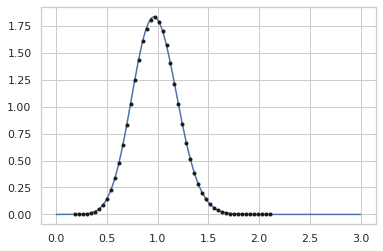

In [7]:
r = np.linspace(0, 3, 3000) # theoretical envelope PDF x axes
plt.plot(r, ku._pdf(r))
plt.plot(ku.X[1:len(ku.X):2], ku.Y[1:len(ku.Y):2], "k.", label='Simulation')

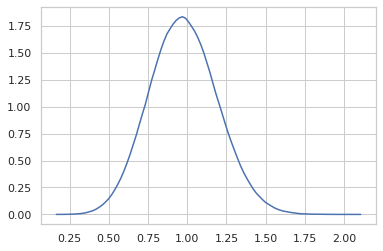

In [8]:
plt.plot(ku.X,ku.Y)

In [9]:
evaluation([0.12726272,0.17092608])

(615.375442293955,)

In [10]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) #-1 to minimze, +1 to maximize
creator.create("Individual", list, fitness=creator.FitnessMin)

# toolbox = base.Toolbox()

### One individual for $\theta_0$ and other for $\theta_1$
$y = \theta_0x + \theta_1$

In [11]:
toolbox = base.Toolbox()

In [12]:
toolbox.register("attr_bool", np.random.uniform, 0.1, 5)
toolbox.attr_bool()

toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.individual()

[3.9271365558171323, 0.21760436207774198, 0.8893643747937061]

In [13]:
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [14]:
pop = toolbox.population(n=500)

In [15]:
hof = tools.ParetoFront()

In [16]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [17]:
# sortedPop = sorted(pop, key=lambda ind:ind.fitness)

In [18]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2,\
                               ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std     	min       	max    
0  	500   	0.759587	0.597271	0.00931627	4.29611
1  	292   	0.487989	0.221294	0.00931627	2.29113
2  	287   	0.334279	0.230733	0.00489278	1.74761
3  	302   	0.162623	0.156179	0.000581391	0.844172
4  	318   	0.0722575	0.104076	0.000197935	0.732595
5  	304   	0.0334542	0.0653303	0.000188927	0.611179
6  	287   	0.0226633	0.0612964	0.000188927	0.65394 
7  	314   	0.0212013	0.0740043	0.000185247	0.644336
8  	296   	0.0204115	0.0753042	0.000185895	0.669943
9  	289   	0.0128484	0.0604049	0.000185895	0.669193
10 	309   	0.0151713	0.0792908	0.000121476	0.649495
11 	290   	0.0121737	0.0759932	0.000121476	0.645011
12 	283   	0.0149903	0.0916154	0.000121476	0.654392
13 	294   	0.00887715	0.0701121	8.19468e-05	0.654392
14 	285   	0.0208117 	0.111248 	8.19468e-05	0.785844
15 	295   	0.00931063	0.0756039	8.19468e-05	0.787592
16 	304   	0.00903936	0.0714265	8.19468e-05	0.645639
17 	320   	0.0117734 	0.0825304	8.19468e-05	0.645011
18 	326   	0.0119461 	0.08

In [19]:
print('Current best fitness:', fitnessFunction(tools.selBest(pop, k=1)[0]))

Current best fitness: (8.194675422833004e-05,)


In [21]:
tools.selBest(pop, k=1)[0]

[2.855578151289607, 2.389874319096517, 0.9971316967590879]

### True function:

$y=2x+3$

$⇒\theta_0=2$

$⇒\theta_1=3$

In [ ]:
len(hof)

In [22]:
print(r'$\theta_0$ is {}, $\theta_1$ is {} and $\theta_1$ is {}.'.format(hof.items[0][0], hof.items[0][1], hof.items[0][2]))

$\theta_0$ is 2.855578151289607, $\theta_1$ is 2.389874319096517 and $\theta_1$ is 0.9971316967590879.


In [ ]:
import matplotlib.pyplot as plt
import networkx

history = tools.History()
graph = networkx.DiGraph(history.genealogy_tree)
graph = graph.reverse()     # Make the graph top-down
colors = [toolbox.evaluate(history.genealogy_history[i])[0] for i in graph]
networkx.draw(graph, node_color=colors)
plt.show()

In [ ]:
# record = stats.compile(pop)
# logbook = tools.Logbook()
# logbook.record(gen=0, evals=30, **record)

In [ ]:
# gen = log.select("gen")
# fit_mins = log.select("min")
# size_avgs = log.select("avg")

In [ ]:
# gen, avg = logbook.select("gen", "avg")

In [ ]:
# logbook.header = "gen", "avg", "spam"

In [ ]:
# print(logbook)

In [ ]:
# gen = logbook.select("gen")
# fit_mins = logbook.chapters["fitness"].select("min")
# size_avgs = logbook.chapters["size"].select("avg")

# import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots()
# line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
# ax1.set_xlabel("Generation")
# ax1.set_ylabel("Fitness", color="b")
# for tl in ax1.get_yticklabels():
#     tl.set_color("b")

# ax2 = ax1.twinx()
# line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
# ax2.set_ylabel("Size", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")

# lns = line1 + line2
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc="center right")

# plt.show()

In [ ]:
# gen = logbook.select("gen")
# fit_mins = logbook.select("min")
# size_avgs = logbook.select("avg")


In [ ]:
# plt.figure(figsize=(10,7))
# plt.plot(gen, size_avgs, "r-", label="Average Fitness")
# plt.xlabel('Generation')
# plt.ylabel('Average Fitness')
# plt.show()

In [ ]:
# plt.plot(gen, fit_mins, "b-", label="Minimum Fitness")
# plt.xlabel('Generation')
# plt.ylabel('Minimum Fitness')
# plt.show()

In [ ]:
fit_mins